# Transfer Learning

We will use Mobilenet V2 Model trained at google: 1.4 million images and 1000 classification categories

We will use this model to classify 5 types of flowers. We will freeze the hidden layers, keeping its original parameters(weights and biases). But train the model using the last output layer using a softmax function classifying the 5 flowers instead of the 1000 classes

In [32]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential

# Import MobileNet Model

In [2]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Metal device set to: Apple M1 Pro


2023-03-22 18:24:44.088290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-22 18:24:44.088334: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


# Prediction using model

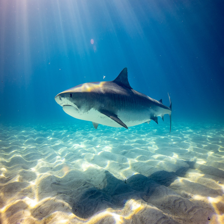

In [3]:
shark = Image.open('Data/Images/shark.jpg').resize(IMAGE_SHAPE)
shark

In [4]:
# Resize image
shark = np.array(shark) / 255.0
shark.shape

(224, 224, 3)

In [5]:
shark

array([[[0.58039216, 0.53333333, 0.64705882],
        [0.6       , 0.55686275, 0.65882353],
        [0.61960784, 0.56862745, 0.67058824],
        ...,
        [0.        , 0.14117647, 0.34509804],
        [0.00392157, 0.14509804, 0.34901961],
        [0.00392157, 0.14509804, 0.34117647]],

       [[0.57647059, 0.53333333, 0.64705882],
        [0.59215686, 0.55294118, 0.65882353],
        [0.61568627, 0.56470588, 0.66666667],
        ...,
        [0.00784314, 0.14509804, 0.34901961],
        [0.00392157, 0.1372549 , 0.34117647],
        [0.00784314, 0.13333333, 0.33333333]],

       [[0.57254902, 0.53333333, 0.64705882],
        [0.58823529, 0.55294118, 0.6627451 ],
        [0.6       , 0.56078431, 0.65882353],
        ...,
        [0.00784314, 0.14117647, 0.34901961],
        [0.        , 0.12941176, 0.3372549 ],
        [0.00392157, 0.12941176, 0.32941176]],

       ...,

       [[0.49019608, 0.36470588, 0.29803922],
        [0.61176471, 0.4745098 , 0.37647059],
        [0.72941176, 0

As we normally supply many images in a prediction, we will add another dimension to our image

In [6]:
shark[np.newaxis, ...]

array([[[[0.58039216, 0.53333333, 0.64705882],
         [0.6       , 0.55686275, 0.65882353],
         [0.61960784, 0.56862745, 0.67058824],
         ...,
         [0.        , 0.14117647, 0.34509804],
         [0.00392157, 0.14509804, 0.34901961],
         [0.00392157, 0.14509804, 0.34117647]],

        [[0.57647059, 0.53333333, 0.64705882],
         [0.59215686, 0.55294118, 0.65882353],
         [0.61568627, 0.56470588, 0.66666667],
         ...,
         [0.00784314, 0.14509804, 0.34901961],
         [0.00392157, 0.1372549 , 0.34117647],
         [0.00784314, 0.13333333, 0.33333333]],

        [[0.57254902, 0.53333333, 0.64705882],
         [0.58823529, 0.55294118, 0.6627451 ],
         [0.6       , 0.56078431, 0.65882353],
         ...,
         [0.00784314, 0.14117647, 0.34901961],
         [0.        , 0.12941176, 0.3372549 ],
         [0.00392157, 0.12941176, 0.32941176]],

        ...,

        [[0.49019608, 0.36470588, 0.29803922],
         [0.61176471, 0.4745098 , 0.37647059]

In [7]:
result = classifier.predict(shark[np.newaxis, ...])
result.shape

2023-03-22 18:24:58.899262: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-22 18:24:59.051859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

4

In [9]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'tiger shark'

# Retrieve Flower Images

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
data_dir = 'Data/datasets/flower_photos'

In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('Data/datasets/flower_photos')

## Read flowers images from disk into numpy array using opencv

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

## Resize flower images

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

# Scale the images pixel values

In [16]:
X = X / 255
X[:3]

array([[[[0.02352941, 0.00392157, 0.00392157],
         [0.        , 0.00392157, 0.00392157],
         [0.2       , 0.14117647, 0.11764706],
         ...,
         [0.95686275, 0.96078431, 0.95294118],
         [0.95686275, 0.96078431, 0.95294118],
         [0.95686275, 0.96078431, 0.95294118]],

        [[0.01176471, 0.03137255, 0.09019608],
         [0.01176471, 0.00784314, 0.00392157],
         [0.05490196, 0.02745098, 0.07058824],
         ...,
         [0.95294118, 0.95686275, 0.94901961],
         [0.95294118, 0.95686275, 0.94901961],
         [0.95294118, 0.95686275, 0.94901961]],

        [[0.16470588, 0.34509804, 0.64705882],
         [0.02745098, 0.00392157, 0.01176471],
         [0.04705882, 0.04705882, 0.09411765],
         ...,
         [0.95686275, 0.96078431, 0.95294118],
         [0.95686275, 0.96078431, 0.95294118],
         [0.95686275, 0.96078431, 0.95294118]],

        ...,

        [[0.56470588, 0.42745098, 0.34117647],
         [0.58431373, 0.44705882, 0.35686275]

# Train/Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Classify Flowers using model

In [18]:
X[0].shape

(224, 224, 3)

In [20]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([613, 310, 592])

In [25]:
image_labels[310]

'bee'

The pretrained model is predicting using its output layer classes such as bee, hankerchief etc

# Take pre-trained model and retrain using flowers images
Take the layers of model besides last classification layer

trainable=False : important as it freezes the weights of the hidden layer

In [26]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False
)

In [37]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretained_model_without_top_layer,
    layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 module_wrapper_1 (ModuleWra  (None, 5)                6405      
 pper)                                                           
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(0.001),
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs= 5)

Epoch 1/5


2023-03-22 18:48:44.649131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


173/173 [==============================] - 82s 464ms/step - loss: 0.6274 - accuracy: 0.7677
Epoch 2/5
173/173 [==============================] - 81s 469ms/step - loss: 0.3163 - accuracy: 0.8934
Epoch 3/5
173/173 [==============================] - 79s 458ms/step - loss: 0.2398 - accuracy: 0.9259
Epoch 4/5
173/173 [==============================] - 78s 452ms/step - loss: 0.2007 - accuracy: 0.9411
Epoch 5/5
173/173 [==============================] - 79s 457ms/step - loss: 0.1634 - accuracy: 0.9575


In [41]:
model.evaluate(X_test,y_test)

2023-03-22 18:55:31.882957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


58/58 [==============================] - 28s 461ms/step - loss: 0.2014 - accuracy: 0.9411


[0.20143930613994598, 0.9411444664001465]

Previously using our own CNN we achieved an accuracy of 0.66. With our transfer learning model we have achieved an accuracy of 0.94